In [1]:
import delfi.distribution as dd

import matplotlib as mpl
import numpy as np
import pandas as pd
import time

from delfi.generator import Default
from delfi.utils.viz import plot_pdf
from lfimodels.channelomics.Channel import Channel
from lfimodels.channelomics.ChannelStats import ChannelStats
from matplotlib import pyplot as plt
%matplotlib inline

GT = {'k': np.array([9, 25, 0.02, 0.002]),
      'na': np.array([-35, 9, 0.182, 0.124, -50, -75, 5, -65, 6.2, 0.0091, 0.024]),
      'ca': np.array([24.6, 11.3, -.031, 37.1, 2.5, 12.6, 18.9, 420]),
      'ih': np.array([.0015, .02, -87.7, -51.7, -.155, .144, 0.0067, .014, -94.2, \
                      -35.5, -.075, .144, 3.086, 4.486e-05, 80, 8.94, 1e-05, 1, 0])}
LP = {'k': ['qa','tha','Ra','Rb'],
      'na': ['tha','qa','Ra','Rb','thi1','thi2','qi','thinf','qinf','Rg','Rd'],
      'ca': ['p1','p2','p3','p4','p5','p6','p7','tau_z'],
      'ih':['a0','b0','ah','bh','ac','bc','aa0','ba0','aah','bah','aac','bac', \
            'kon','koff','b','bf','ai','gca','shift']}

channel_type = 'k'

gt = GT[channel_type]
labels_params = LP[channel_type]
lims = np.sort(np.concatenate((0.5*gt.reshape(-1,1),1.5*gt.reshape(-1,1)),axis=1))
n_params = len(gt)

m = Channel(channel_type=channel_type, n_params=n_params)
p = dd.Uniform(lower=lims[:,0], upper=lims[:,1])
s = ChannelStats(channel_type=channel_type)
g = Default(model=m, prior=p, summary=s)

xo = m.gen(gt.reshape(1,-1))
xo_stats = s.calc(xo[0])

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

0/|/Run simulations :   0%|| 0/1 [00:00<?, ?it/s]


In [ ]:
from delfi.inference import SNPE

svi = False
inf_snpe = SNPE(g, obs=xo_stats, n_components=2, n_hiddens=[50,50],svi=svi)
log, train_data, posterior = inf_snpe.run(n_train=2500, n_rounds=1)

HBox(children=(IntProgress(value=0), HTML(value='')))

0/|/Draw parameters (pilot run) :   0%|| 0/100 [00:00<?, ?it/s]


HBox(children=(IntProgress(value=0), HTML(value='')))

0/|/Run simulations (pilot run) :   0%|| 0/100 [00:00<?, ?it/s]


HBox(children=(IntProgress(value=0, max=2500), HTML(value='')))

0/|/Draw parameters (round 1) :   0%|| 0/2500 [00:00<?, ?it/s]


HBox(children=(IntProgress(value=0, max=2500), HTML(value='')))

0/|/Run simulations (round 1) :   0%|| 0/2500 [00:00<?, ?it/s]

## 13.5h runtime, 2500 simulations

In [4]:
import delfi.utils.io as io
import pickle

io.save(inf_snpe, 'run_1_k.pkl')
pickle.dump(log, open('run_1_log_k.pkl', 'wb'))

In [6]:
posterior = inf_snpe.predict(xo_stats)

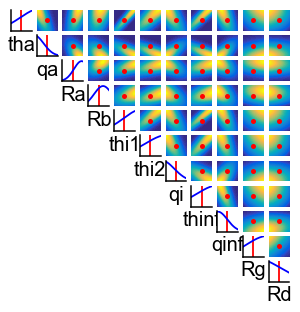

In [7]:
plot_pdf(posterior, 
         gt=gt, 
         ticks=False,
         labels_params=labels_params,
         lims=lims);